# Reporte 8
##### Curso: Fundamentos de Macroeconomía (0651)
##### Nombre: Sebastián Daniel Gómez Farje
##### Código: 20200901
##### Fecha: 6/11/2022

## Parte 1: Reporte de Lectura

En su artículo ‘The Persistent Effects of Peru’s Mining Mita’, Melissa Dell examina los efectos a largo plazo que el sistema de la mita tuvo en Perú y Bolivia. La autora indaga en la discontinuidad de diversos indicadores entre la población actual promedio peruana y aquella población que habita en áreas donde la mita minera fue aplicada durante el Virreinato del Perú. Se justifica la importancia de indagar en este fenómeno andino argumentando que un estudio así podría esclarecer otra más amplia área de estudio: ¿cómo y hasta qué punto el Estado puede moldear interacciones económicas en América Latina?. A continuación, se presentará el artículo, sus propuestas y la contribución del estudio.

La pregunta de investigación que la autora indirectamente presenta para su artículo es la siguiente: ¿la imposición de la mita minera durante el dominio español tiene efectos a largo plazo en la actualidad en las áreas donde este sistema fue empleado? Para responder a esta pregunta, la autora primero define términos como la mita, explica el sistema, delimita el área de imposición del sistema y delimita el segmento específico en que el estudio se realiza. Luego, la autora explica la metodología a ser utilizada, es decir, los indicadores que el estudio revisará y cómo serán medidos, evaluados y aplicados. Acto seguido, el artículo presenta los resultados de la data, tablas y mapas para demostrar la información obtenida. Como es un estudio que se enfoca en el largo plazo, Dell también incluye los canales de persistencia que la literatura considera que con importantes: posesión de tierra y sistemas de labor, bienes públicos, y participación en el mercado y determinantes del consumo doméstico. Por último, el estudio culmina presentando brevemente las conclusiones. 

El artículo presenta tanto fortalezas como debilidades. Como fortaleza, la autora es consciente de los casos atípicos porque, al momento de seleccionar el área donde se realizaría el estudio, se excluye Cusco. A pesar de que la ciudad y el área inmediatamente adyacente a Cusco estén dentro del área geográfica de uso histórico de la mita minera, la autora determina que, por su pasado histórico como centro de poder y riqueza, durante el Tawantinsuyu o el Virreinato del Perú, incluir a Cusco alteraría la data y los efectos estudiados. En cuanto a las debilidades, la autora explícitamente menciona que la regresión utilizada para el estudio no es la ideal. Se menciona que lo ideal sería aplicar una regresión no paramétrica, pero que, para este caso, requeriría información geográfica muy precisa como las coordenadas de longitud y latitud de cada caso. Esta información no está disponible por motivos de confidencialidad del Estado peruano, ergo se ha aplicado una regresión semi paramétrica.

El artículo aporta a la pregunta de estudio porque trae el tema de la mita minera al presente. De este modo, continua con los estudios históricos de la mita minera virreinal, pero aplica los posibles efectos al contexto actual. Por otro lado, contribuye a la pregunta más general de “¿cómo y hasta qué punto el Estado puede moldear interacciones económicas en América Latina?” porque aporta, mediante comparaciones a largo plazo históricas, una herramienta para indagar sobre este fenómeno en América Latina.

Para continuar la pregunta de investigación del artículo (“¿la imposición de la mita minera durante el dominio español tiene efectos a largo plazo en la actualidad en las áreas donde este sistema fue empleado?”), se podría investigar acerca de diferentes indicadores para seguir observando posibles efectos que la mita minera pudo tener a largo plazo, i.e. en la actualidad. Un estudio reciente que sigue esa línea de estudio sería ‘La mita minera en Huancavelica y el despoblamiento durante los siglos XVI-XVIII. El caso de la provincia de Chimbivilcas, Perú’, de Sisko Rendón en 2016. Por otro lado, para continuar con la pregunta de estudio más general (“¿cómo y hasta qué punto el Estado puede moldear interacciones económicas en América Latina?”), simplemente se debería investigar otras maneras en que el Estado afecta las interacciones económicas. Esta área de estudio puede ser interminable porque, desde perspectivas constructivistas, por ejemplo, cualquier acto del Estado tendría este efecto. El artículo ‘The challenges of the global economic situation for Latin America’ de Ángel Gurria innova en el tema porque explora el Estado y las interacciones teniendo en mente los efectos del sistema internacional. Otro artículo, es el de Heidi Colleran: ‘Market integration and the changing nature of social interactions in agricultural populations’, que trata el tema desde una perspectiva más tradicional y enfocándose en las interacciones económicas de poblaciones agrarias.


## Parte 2: Código

$Colaboradores:$

- Joaquín Alfredo del Castillo Ugarte (20201448)
- Sebastian Elías Torres Tapia (20201586)
- Sebastián Daniel Gómez Farje (20200901)

In [4]:
import numpy as np 
import pandas as pd
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import seaborn as sns
import pylab as plt

import statistics
from causalgraphicalmodels import CausalGraphicalModel
import os
from statsmodels.iolib.summary2 import summary_col

import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS

### Instrumental Variables

- ¿En qué consiste el supuesto de "Relevance"?

El supuesto de "relevance" implica que, valga la redundancia, la variable instrumental debe ser relevante. Una variable instrumental es relevante en la medida en que parte de la variable independiente es explicada por la variable instrumental. Entonces, mientras más porcentaje de la variable independiente sea explicada por la variable instrumental, se considera que hay mayor "relevance"; este supuesto se puede medir con la correlación entre ambas variables. No se cumple el supuesto si la variable instrumental no explica en absoluto la variable independiente. No obstante, como en la realidad es poco probable que el valor explicativo de una variable instrumental sea verdaderamente cero, también se asume que no se cumple el supuesto si es que la correlación entre ambas variables es muy baja, porque se considerará a dicha variable instrumental como una herramienta débil para explicar afectar a la variable independiente. En suma, el supuesto implica que la variable instrumental verdaderamente está relacionada con la variable independiente a la que supuestamente afecta.

- ¿En qué consiste el supuesto de "Validity"?

El supuesto de "validity" es más complicado de asegurar y, en la realidad, nunca se puede definir si el supuesto es 100% completamente válido. El supuesto implica que la única manera en que la variable instrumental está afectando a la variable dependiente es mediante la variable independiente de la que es variable instrumental. Es decir, si la variable instrumental estuviera hipotéticamente afectando a otra variable independiente adicional que tuviera efecto en la variable dependiente final, entonces la validez se ve perjudicada.

### Ploteo de histogramas

In [19]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

data = read_data("card.dta")
data

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,5218.0,0.0,1.0,12.0,25.0,8.0,12.0,82135.0,1.0,0.0,...,15.0,NaN,1.0,0.0,7.0,5.814130,49.0,-0.289775,6.103905,-1.505588
3006,5219.0,0.0,1.0,13.0,34.0,NaN,NaN,88765.0,1.0,0.0,...,43.0,NaN,1.0,1.0,15.0,6.175867,225.0,-0.137418,6.313285,2.214089
3007,5220.0,0.0,1.0,12.0,24.0,11.0,NaN,89271.0,0.0,0.0,...,25.0,109.0,1.0,0.0,6.0,6.214608,36.0,0.135805,6.078803,-1.907211
3008,5221.0,0.0,1.0,12.0,31.0,NaN,NaN,110376.0,1.0,0.0,...,32.0,107.0,1.0,1.0,13.0,6.569481,169.0,0.408375,6.161106,0.868737


#### Grafique dos histogramas para la variable años de educación educ para cuando nearc4 == 1, y cuando nearc4 == 0. Compare y describa los patrones que encuentra.

In [20]:
data1 = data

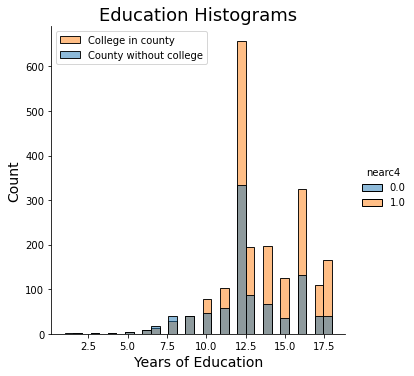

In [34]:
sns.displot(data1, x="educ", hue="nearc4")
labels= ["College in county","County without college"]
plt.xlabel("Years of Education", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Education Histograms", fontsize=18)
plt.legend(labels)

Existe una clara diferencia entre ambos histogramas. Cuando nearc4 es igual a 1, en condados donde hay un centro educativo superior, la distribución está más a la derecha. Es decir, para condados con centro educativo superior, la variable años de educación suele ser mayor. Esto se evidencia en que las 9 últimas y mayores columnas de la variable cantidad de años de educación (desde 10 a 18 años aprox.) presentan una significativa superioridad por parte de los casos en que nearc4 es 1. Por otro lado, cuando nearc4 es 0, en condados sin centro educativo superior, la cantidad de casos es significativamente menor en las columnas de mayor número de años de eduación. De hecho, los casos donde nearc4 es igual a 0 tienen superioridad numérica tan solo en las columnas etáreas 7 y 8, columnas de cantidad de años educativos menores (7 y 8 años de edad aprox.). No obstante, cabe resaltar que la distribución per se es similar, solamente que nearc4 = 1 tendría mayores cantidades.

#### Grafique dos histogramas para la variable años del logaritmos de los ingresos lwage para cuando nearc4 == 1, y cuando nearc4 == 0. Compare y describa los patrones que encuentra.

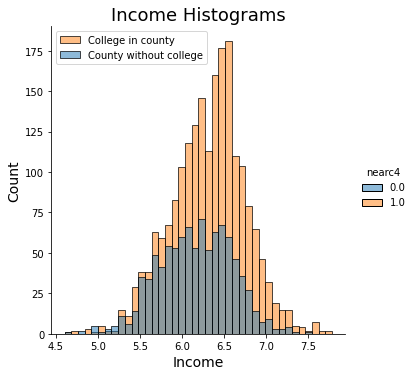

In [32]:
sns.displot(data1, x="lwage", hue="nearc4")
labels= ["College in county","County without college"]
plt.xlabel("Income", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Income Histograms", fontsize=18)
plt.legend(labels)

También existen diferencias entre ambos histogramas de ingresos. En cuanto a la distribución, pareciera que los condados en que no hay centros de educación superior están ligeramente más sesgados a la izquierda. No es una diferencia notoria, pero sí hay diferencia en este caso (en los histogramas de años de educación era relativamente similar). Se evidencia la diferencia en distribución porque se nota que las cantidades máximas en el eje x de nearc4 = 0 están entre 6 y 6.5 (con punto máximo en 6.3 aprox.). Por otro lado, las cantidades máximas en nearc4 = 1 están entre 6.2 y 6.7 (con punto máximo en 6.7 aprox.). Además de eso, los condados con centro de educación superior cuentan con cantidades significativamente superiores en la mayoría de columnas de distribución, con nearc4 = 0 solo superándolos en algunas columnas menores.

### Regresiones

In [36]:
reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
              data = data1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     219.2
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.97e-232
Time:                        16:12:51   Log-Likelihood:                -1273.9
No. Observations:                3003   AIC:                             2562.
Df Residuals:                    2996   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0633      0.064     79.437      0.000       4.938       5.188
educ           0.0712      0.003     20.438      0.000       0.064       0.078
exper          0.0342      0.002     15.422      0.000       0.030       0.038
black         -0.1660      0.018     -9.426      0.000      -0.201      -0.131
south         -0.1316      0.015     -8.788      0.000      -0.161      -0.102
married       -0.0359      0.003    -10.547      0.000      -0.043      -0.029
smsa           0.1758      0.015     11.372      0.000       0.145       0.206
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.430
Skew:                          -0.231   Prob(JB):                     8.38e-16
Kurtosis:                       3.584   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Con un R cuadrado de 0.305, el modelo construido explica la variable dependiente, lwage, en 30.5%. Se puede notar que todas las variables independientes en el modelo son significativas porque todos los p-value (P>|t|) son menores a 0.05. Si observamos a la variable educ (la variable que será instrumentalizada más adelante) en este modelo, se concluye que, por cada unidad en que varíe, la variable dependiente aumentará en 0.0712.

In [38]:
data1['married'] = data1['married'].fillna(0)

In [40]:
reg_iv = IV2SLS.from_formula("lwage ~  1 + exper + black + south + married + smsa + [educ ~ nearc2 ]", data1).fit()
reg_iv.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  lwage   R-squared:                     -1.3114
Estimator:                    IV-2SLS   Adj. R-squared:                -1.3160
No. Observations:                3010   F-statistic:                    289.62
Date:                Sun, Nov 13 2022   P-value (F-stat)                0.0000
Time:                        16:33:33   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      0.1276     3.1412     0.0406     0.9676     -6.0290      6.2843
black          0.1134     0.1816     0.6244     0.5324     -0.2425      0.4692
exper          0.1515     0.0747     2.0274     0.0426      0.0050      0.2980
married       -0.0151     0.0147    -1.0258     0.3050     -0.0438      0.0137
smsa           0.0201     0.1030     0.1949     0.8455     -0.1819      0.2220
south         -0.0319     0.0692    -0.4603     0.6453     -0.1675      0.1038
educ           0.3618     0.1849     1.9562     0.0504     -0.0007      0.7243
==============================================================================

Endogenous: educ
Instruments: nearc2
Robust Covariance (Heteroskedastic)
Debiased: False
"""

A diferencia del anterior modelo, se encuentra que tan solo la variable exper demuestra ser significativa, ya que el resto de variables presentan p-value mayor a 0.05. Se nota la diferencia en la variable a la que se le aplicó un instrumento, ya que por cada unidad en que varíe la variable educ en este modelo, la variable dependiente aumentará en 0.3618. El único cambio entre este modelo y el anterior es que se ha aumentado un instrumento a la variable educ, por lo que eso es lo que ha ocasionado estos cambios. En ese sentido, es probable que las variables hayan pasado de ser significativas (en el primer modelo) a no significativas (en este modelo) porque no se tenía en consideración la manera en que nearc2 estaba afectando a educ y el modelo en su conjunto. Similarmente, educ genera un mayor cambio en la variable dependiente en este modelo posiblemente porque ya se tiene en consideración la "backdoor" que representaba nearc2.